In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Confusion matrix & metrics

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## (1) 데이터 준비

In [4]:
# classification 위한 임의의 데이터 생성 -> X: 2개 feature, y:binary 인 데이터 샘플 100개
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [5]:
model = LogisticRegression().fit(X,y)

y_score = model.decision_function(X)  
y_pred = model.predict(X)

# decision_function(): 판별함수 결과값 계산
# predict(): y_score가 양수이면 y=1, 음수이면 y=0으로 분류

/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
y

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [7]:
y_score

array([ 6.27782795,  0.11786644,  0.31981708, -3.49403155,  1.65893942,
       -2.74124899,  4.4759447 ,  3.11399176,  5.7432352 ,  2.74766599,
        1.60157065, -1.43016078, -4.56018515, -5.42202298, -2.07274985,
        1.48119884, -4.34066665,  4.41654113, -1.50155822, -1.97419396,
       -3.16599766, -1.69971271, -1.54602991,  4.13539196,  5.93286031,
        0.85477642,  0.50755373, -1.77456397,  3.81043766, -2.57952369,
       -1.36898166,  2.8208002 ,  2.6654464 ,  1.31464556, -2.06229708,
       -3.58760036, -1.65060423,  0.98496094, -2.80841279,  2.87813442,
       -1.92048037, -1.92356285, -3.55801768, -6.77404761,  1.1433758 ,
       -1.94288486, -2.30608719, -1.71424118, -6.56781377, -4.71256754,
        3.60557984,  4.21209671, -5.74850626,  2.96824753,  2.72182818,
        4.17958966,  1.67556143,  1.77591675,  0.27636197,  4.58349363,
       -2.59038005,  3.50096429, -5.94934713, -3.41898773, -1.30943289,
        2.00442322, -2.01122517,  4.81379622,  0.36749551,  0.97

In [8]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [9]:
# 데이터프레임 형태로 확인해 보자

df = pd.DataFrame(np.vstack([y_score, y_pred, y]).T,columns=["y_score", "y_pred", "y"])
df = df.sort_values("y_score", ascending=False).reset_index(drop=True)

In [10]:
display(df.head(), df.tail())

,y_score,y_pred,y
0,6.685275,1.0,1.0
1,6.277828,1.0,1.0
2,5.932860,1.0,1.0
3,5.743235,1.0,1.0
4,5.050055,1.0,1.0


,y_score,y_pred,y
95,-6.567814,0.0,0.0
96,-6.774048,0.0,0.0
97,-7.190321,0.0,0.0
98,-8.036380,0.0,0.0
99,-8.879854,0.0,0.0


## (2) confusion matrix 생성

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [12]:
print(confusion_matrix(y, y_pred)) # TP FN FP TN

[[46  5]
 [ 2 47]]


In [13]:
print('accuracy score: ',accuracy_score(y, y_pred) )
print('precision score: ',precision_score(y, y_pred) )
print('recall score: ',recall_score(y, y_pred) )
print('f1 score: ',f1_score(y, y_pred) )

accuracy score:  0.93
precision score:  0.9038461538461539
recall score:  0.9591836734693877
f1 score:  0.9306930693069307


In [14]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.90      0.96      0.93        49

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [15]:
# 로지스틱 회귀의 threshold(임계값) 를 0이 아닌 -2로 지정해 보자 
lower_threshold = model.decision_function(X) > -2

df2 = pd.DataFrame(np.vstack([y_score, lower_threshold, y]).T,
                  columns=["y_score", "y_hat", "y"])
df2 = df2.sort_values("y_score", ascending=False).reset_index(drop=True)


In [16]:
display(df2[(df2['y_score']> -2.5) & (df2['y_score']<-1.5)])

,y_score,y_hat,y
57,-1.501558,1.0,0.0
58,-1.546030,1.0,0.0
59,-1.650604,1.0,0.0
60,-1.699713,1.0,0.0
61,-1.714241,1.0,0.0
62,-1.774564,1.0,0.0
63,-1.920480,1.0,0.0
64,-1.923563,1.0,0.0
65,-1.942885,1.0,0.0
66,-1.974194,1.0,1.0


In [17]:
print(confusion_matrix(y, lower_threshold))

[[33 18]
 [ 0 49]]


In [18]:
print(classification_report(y, lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        51
           1       0.73      1.00      0.84        49

    accuracy                           0.82       100
   macro avg       0.87      0.82      0.82       100
weighted avg       0.87      0.82      0.81       100



# 2. ROC, PR 곡선 그리기

In [19]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [20]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
model = LogisticRegression().fit(X,y)
y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred = model.fit(X_train, y_train).predict(X_test)

/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [23]:
print(roc_auc)

0.9192207792207794


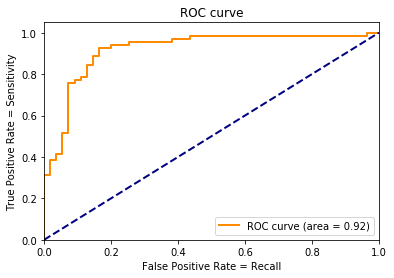

In [24]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
print(confusion_matrix(y_test, y_pred))

[[44 11]
 [ 4 66]]


# 3. Cross Validation

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)

for train_index, test_index in cv.split(X):
    print(X[train_index], y[test_index])
    
# cv.split(X)는 X를 k-fold로 나눈 뒤 각 fold에서의 (train_index, test_index)를 반환하는 iterable

[[ 1.16418024 -2.72659894]
 [-0.81989472  2.11292617]
 [ 0.38236848 -1.26403752]
 [ 0.43001494 -0.96666759]
 [ 1.37728654 -0.83291489]
 [ 1.07053843  0.49001625]
 [-0.82218525  1.61061133]
 [ 0.31198191  0.08883587]
 [ 1.22480645  0.5915688 ]
 [ 0.58696175  1.02909919]
 [ 0.49736079 -1.74096417]
 [ 0.91233098  1.85824149]
 [ 0.19129907 -0.85314437]
 [ 1.22469362  0.36996758]
 [ 0.43074358  0.08759905]
 [ 0.61010906 -2.25637775]
 [-1.43987671 -1.36912691]
 [ 1.12928913 -2.02906671]
 [-0.42294461 -0.74481839]
 [-2.19979696 -2.46828587]
 [ 0.72187807 -1.6593785 ]
 [-0.83297444 -0.9129247 ]
 [ 0.1654868  -0.79248654]
 [ 1.900721    0.87304097]
 [ 0.55169451 -2.16879953]
 [ 0.76374982  0.68979448]
 [-2.44824917 -2.44461079]
 [-0.07707029  0.08526768]
 [ 0.85211809 -2.47856258]
 [ 0.0993398  -2.32401865]
 [ 1.40288479  0.31981568]
 [ 0.88144906 -0.34436152]
 [-1.85299986 -1.37233246]
 [-0.0913555  -1.30743968]
 [ 0.9493075   2.35811079]
 [ 1.64118018 -2.91919433]
 [ 1.38161885  0.96350324]
 

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # target이 골고루 분포되도록 shuffle 옵션

In [29]:
scores = cross_val_score(LogisticRegression(), X, y, cv=kfold)  # cross_val_score(모델, 데이터, 타깃)
scores # 각 fold에 대한 score

/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

array([0.86, 0.82, 0.83, 0.86, 0.89])

In [30]:
scores = cross_val_score(LogisticRegression(), X, y) 
scores 
# cross_val_score의 기본값은 k=3

/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.79640719, 0.88622754, 0.87951807])

In [31]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
scores
# cross_val_score는 기본적으로 분류 모델에 대해 StratifiedKfold 사용

/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

array([0.81188119, 0.8       , 0.87      , 0.89      , 0.86868687])

In [32]:
display(scores.mean(), scores.var()) # 교차검증 점수들의 평균과 분산 확인

0.8481136113611362

0.0012568901140139006

# 4. Grid Search

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [34]:
iris_data = load_iris()

In [35]:
X_train, X_test, y_train,y_test = train_test_split(iris_data.data,iris_data.target, test_size = 0.2, random_state = 121)

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [38]:
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

In [39]:
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [40]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)

In [41]:
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [42]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [43]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


# Quest

In [1]:
from sklearn.datasets import load_breast_cancer

In [18]:
b_cancer = load_breast_cancer()

print(b_cancer['feature_names'])
print(b_cancer.data.shape, b_cancer.data[:, 0:2].shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30) (569, 2)


In [38]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    b_cancer.data[:, :2],
    b_cancer.target,
    test_size = 0.3,
)
print(X_train.shape, y_train.shape)

(398, 2) (398,)


In [39]:
print(y_score.shape, y_pred.shape)
print(y_score[:10], y_pred[:10])

(171,) (171,)
[-0.34888219  2.6766916   0.22888066 -2.66682455  1.08492507 -0.19861688
  2.61215573 -2.06243699  2.54528176  0.76396261] [0 1 1 0 1 0 1 0 1 1]


In [40]:
(y_train == 0).sum(), (y_train == 1).sum()
# therefore, use ROC

(144, 254)

In [43]:
from sklearn.linear_model import LogisticRegression

# decision tree
model = LogisticRegression().fit(X_train, y_train)

y_score = model.decision_function(X_test)
y_pred = model.predict(X_test)

/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
print(roc_auc)

0.9310394060536836


In [47]:
from sklearn.svm import LinearSVC

# SVM
model = LinearSVC(C=1).fit(X_train, y_train)

y_score = model.decision_function(X_test)
y_pred = model.predict(X_test)

# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
print(roc_auc)

0.9461736150770987


/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
# use SVM!

In [55]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1.0, 10.0], 'loss':['hinge','squared_hinge']}
grid_dtree = GridSearchCV(model, param_grid = parameters, cv = 5, refit = True, scoring='roc_auc')
grid_dtree.fit(X_train, y_train)

/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/youngseo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase th

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10.0],
                         'loss': ['hinge', 'squared_hinge']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [57]:
import pandas as pd

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.1, 'loss': 'hinge'}",0.896869,6,0.926302,0.839757,0.950642
1,"{'C': 0.1, 'loss': 'squared_hinge'}",0.945167,5,0.966193,0.924273,0.974983
2,"{'C': 1.0, 'loss': 'hinge'}",0.948165,3,0.966193,0.934415,0.975659
3,"{'C': 1.0, 'loss': 'squared_hinge'}",0.953206,1,0.956728,0.959432,0.975659
4,"{'C': 10.0, 'loss': 'hinge'}",0.945328,4,0.931711,0.951318,0.962813
5,"{'C': 10.0, 'loss': 'squared_hinge'}",0.949677,2,0.957404,0.953347,0.963489


In [60]:
estimator = grid_dtree.best_estimator_

y_score = estimator.decision_function(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(roc_auc_score(y_test, y_score)))

테스트 데이터 세트 정확도: 0.9480
